## Importing Libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Load the data

In [15]:
df=pd.read_csv('stock.csv')
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


## Exploratory Data Analysis (EDA)

In [16]:
df.shape

(619040, 7)

In [17]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [19]:
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

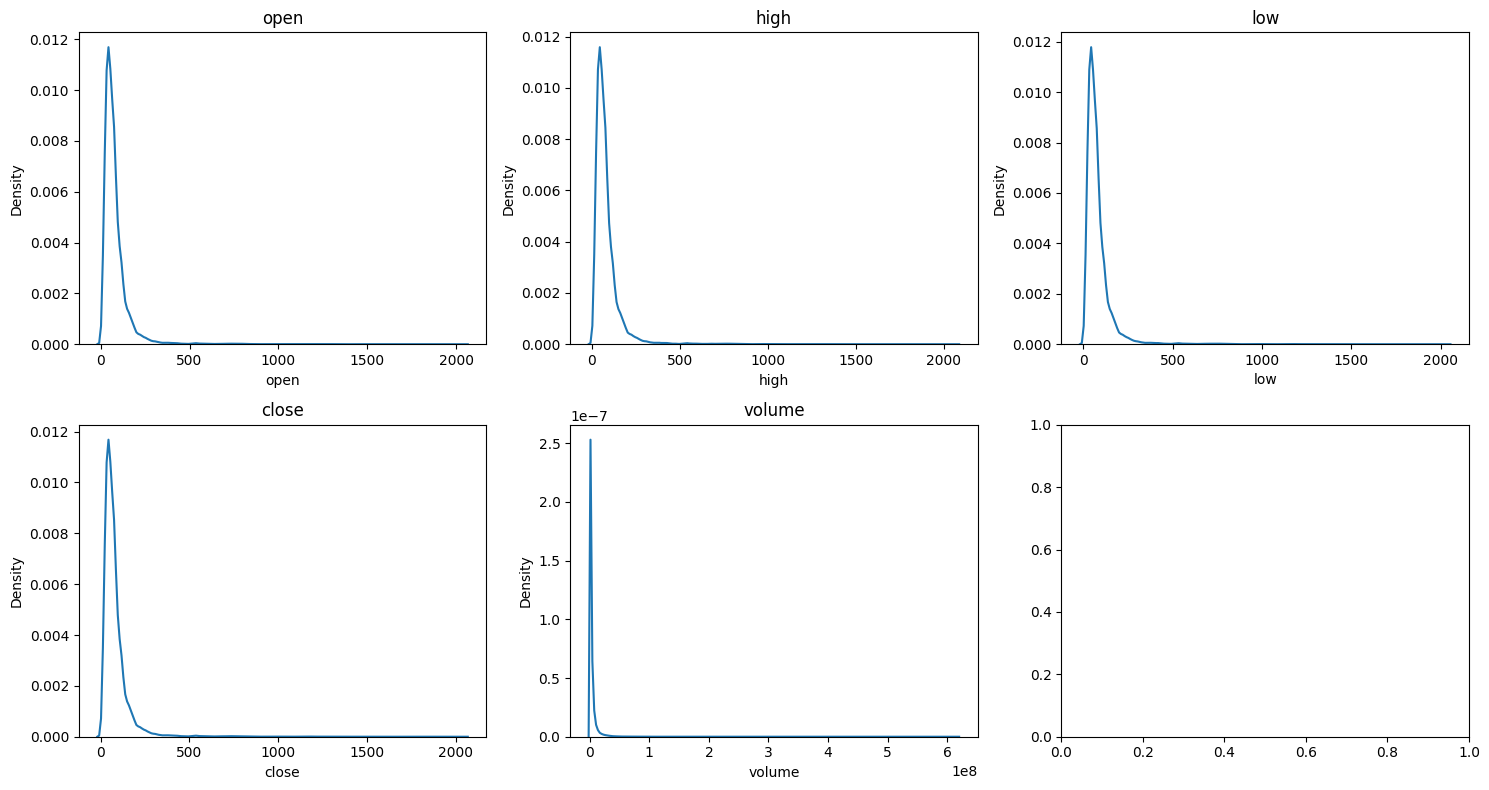

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

columns_to_plot = ['open', 'high', 'low', 'close', 'volume']

for i, col in enumerate(columns_to_plot):
    row_idx = i // 3
    col_idx = i % 3


    sns.kdeplot(data=df, x=col, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(col)
# Adjust subplot layout
plt.tight_layout()
plt.show()


In [21]:
df['open']=df['open'].fillna(df['open'].median)
df['high']=df['high'].fillna(df['high'].median)
df['low']=df['low'].fillna(df['low'].median)


In [22]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

## Encoding Data

In [23]:
le=LabelEncoder()
df['Name']=le.fit_transform(df['Name'])

In [24]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,1
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,1
2,2013-02-12,14.45,14.51,14.1,14.27,8126000,1
3,2013-02-13,14.3,14.94,14.25,14.66,10259500,1
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,1
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,504
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,504
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,504
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,504


## Train Test Split

In [25]:
df = df[['close']].values.astype(float)

#Data Scaling
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
#Train Test Split
train_size = int(len(df) * 0.80)
train_data, test_data = df[:train_size], df[train_size:]


In [29]:
import numpy as np
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(df) - seq_length):
        X.append(df[i:i+seq_length])
        y.append(df[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10

X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)


## Applying LSTM algorithm

In [30]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
19345/19345 [==============================] - 134s 7ms/step - loss: 1.8117e-05
Epoch 2/10
19345/19345 [==============================] - 130s 7ms/step - loss: 7.3427e-06
Epoch 3/10
19345/19345 [==============================] - 132s 7ms/step - loss: 6.6414e-06
Epoch 4/10
19345/19345 [==============================] - 131s 7ms/step - loss: 6.5565e-06
Epoch 5/10
19345/19345 [==============================] - 131s 7ms/step - loss: 6.6399e-06
Epoch 6/10
19345/19345 [==============================] - 131s 7ms/step - loss: 6.4720e-06
Epoch 7/10
19345/19345 [==============================] - 126s 7ms/step - loss: 6.3663e-06
Epoch 8/10
19345/19345 [==============================] - 124s 6ms/step - loss: 6.4252e-06
Epoch 9/10
19345/19345 [==============================] - 131s 7ms/step - loss: 6.2773e-06
Epoch 10/10
19345/19345 [==============================] - 130s 7ms/step - loss: 6.2048e-06


In [31]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions to the original scale
y_pred = scaler.inverse_transform(y_pred)



19345/19345 [==============================] - 56s 3ms/step


## Evaluating the Result

In [32]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 85.10744168127329
Mean Squared Error (MSE): 16628.736601102635
Root Mean Squared Error (RMSE): 128.95245868575998
